In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_excel('dataset_covid.xlsx')
df = data.copy()

# 1. Exploratory Data Analysis

In [18]:
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.shape

(5644, 111)

In [21]:
df.dtypes.value_counts()

float64    70
object     37
int64       4
dtype: int64

<Axes: >

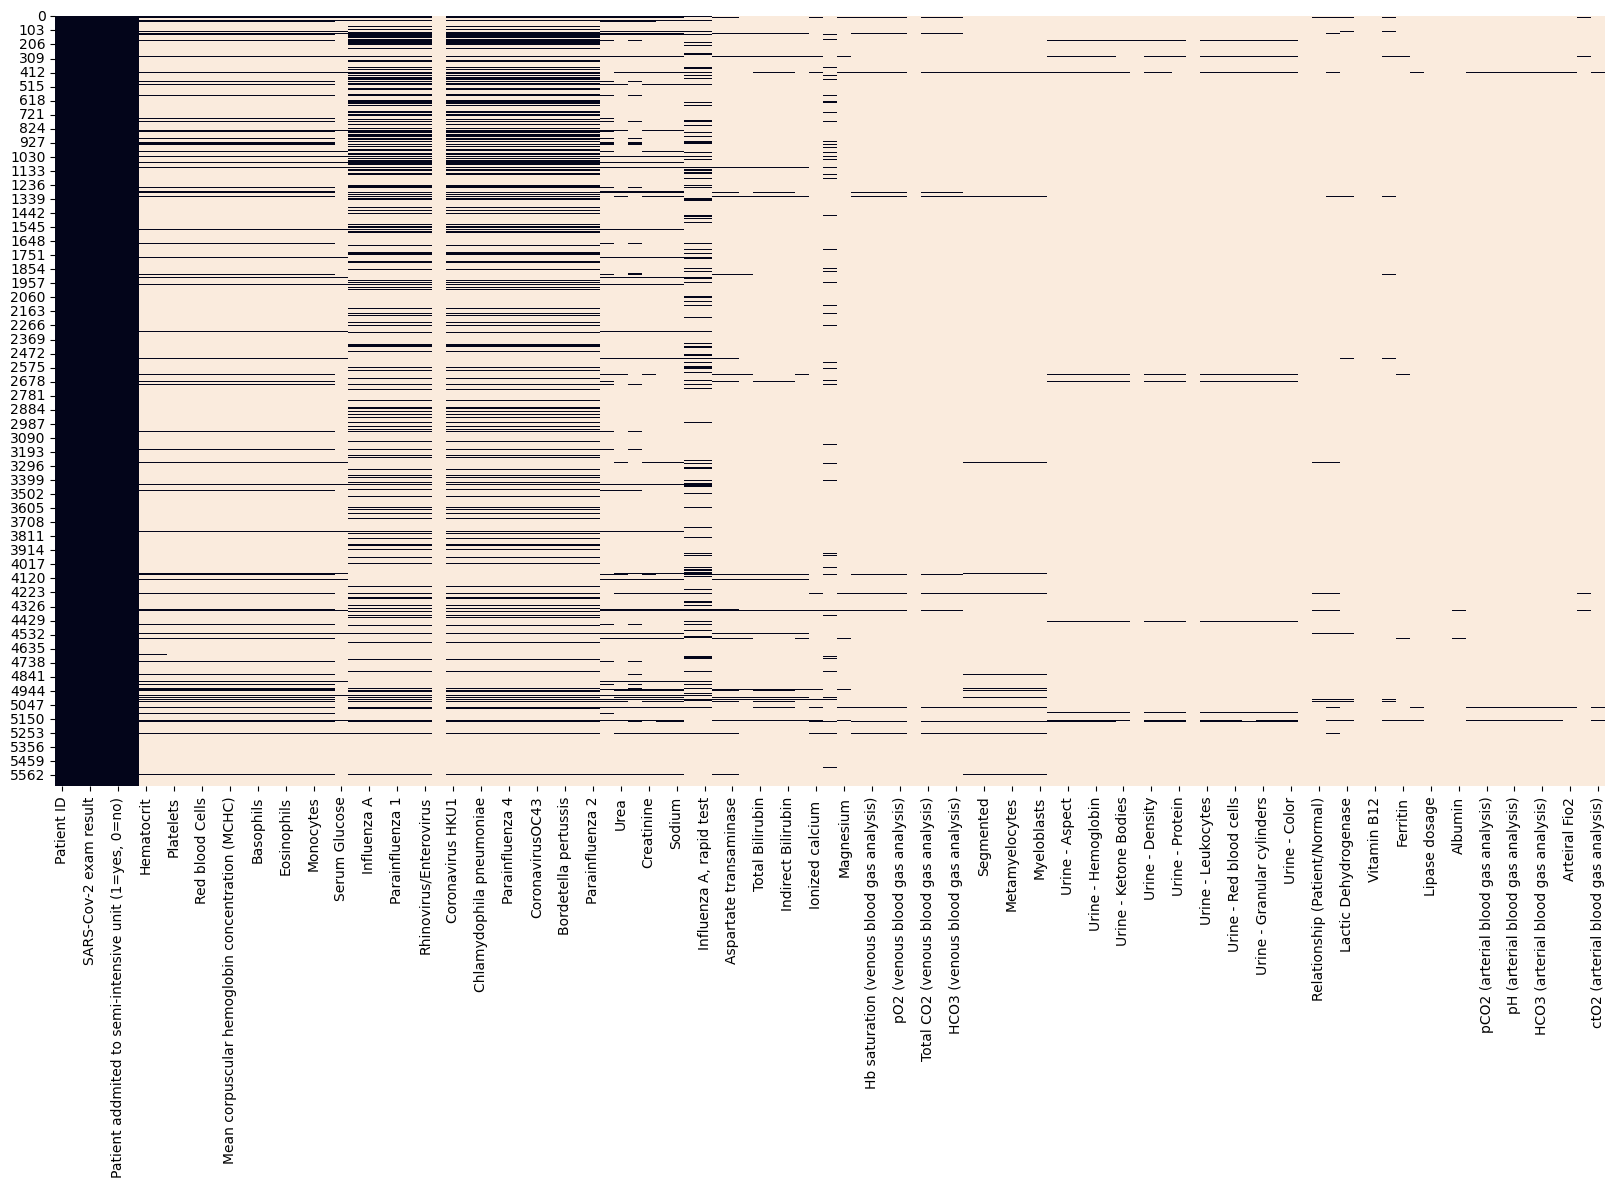

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)

In [35]:
pd.set_option('display.max_row',111)

In [38]:
(df.isna().sum()/df.shape[0]).sort_values()

Patient ID                                               0.000000
Patient age quantile                                     0.000000
SARS-Cov-2 exam result                                   0.000000
Patient addmited to regular ward (1=yes, 0=no)           0.000000
Patient addmited to semi-intensive unit (1=yes, 0=no)    0.000000
Patient addmited to intensive care unit (1=yes, 0=no)    0.000000
Influenza B                                              0.760099
Influenza A                                              0.760099
Respiratory Syncytial Virus                              0.760099
Parainfluenza 4                                          0.760454
Chlamydophila pneumoniae                                 0.760454
Parainfluenza 3                                          0.760454
Coronavirus HKU1                                         0.760454
Rhinovirus/Enterovirus                                   0.760454
CoronavirusNL63                                          0.760454
Parainflue

## 1.1 Analyse de la forme

Variable target : SARS-Cov-2 exam result  
Lignes et colonnes : 5644 lignes, 111 colonnes  
Types de variables : 70 variables quantitatives et 41 qualitatives  
Analyse des valeurs manquantes : On voit sur la heatmap qu'il y a énormément de valeurs manquantes, et que l'on va pouvoir s'intérésser à principalement deux groupes de variables au vu des pourcentages (test viral et test sanguin)

## 1.2 Analyse du fond

Visualisation de la target : 5086 négatifs et 558 positifs, plus ou moins 10% de positifs  
Signification des variables : variables continues standardisées, certaines asymétriques  
                              Patient age quantile : la variable à été transformée et on ne sait pas comment, difficile de faire des conclusions  
Analyse variables qualitatives : Toutes des variables binaires, Parainfluenza 2 ne contient que une seule option donc on va pouvoir la supprimer, et Rhinovirus/Enterovirus est très élevé

In [58]:
#elimination des colonnes avec plus de 90% de NaN et de patient ID
df = df[df.columns[df.isna().sum()/df.shape[0] < 0.9]]
df.drop('Patient ID',axis=1, inplace=True)

In [61]:
df['SARS-Cov-2 exam result'].value_counts()

negative    5086
positive     558
Name: SARS-Cov-2 exam result, dtype: int64

### Analyse des variables quantitatives

In [72]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col])
    plt.close() #remove this line to render the plots

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

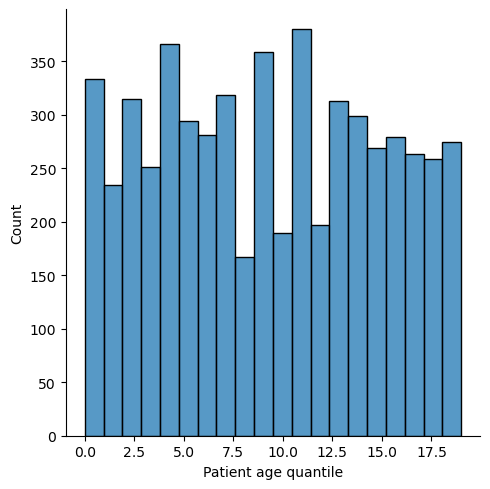

In [82]:
sns.displot(df['Patient age quantile'], bins = 20)

### Analyse des variables qualitatives

In [86]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')

SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

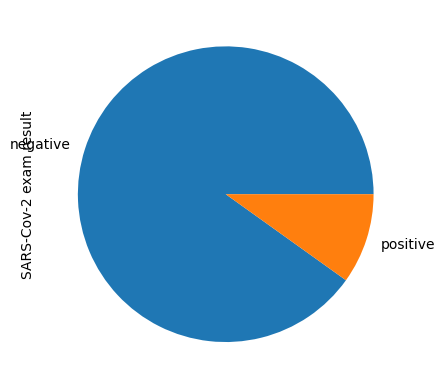

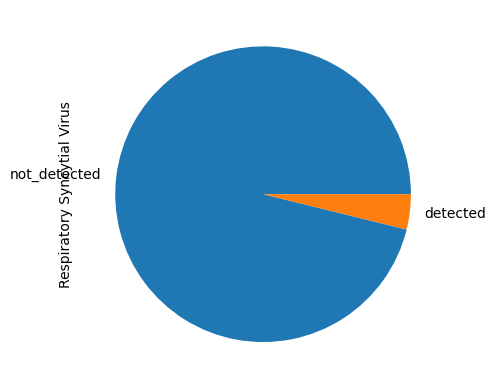

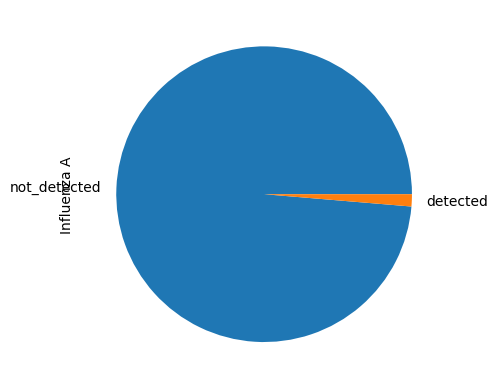

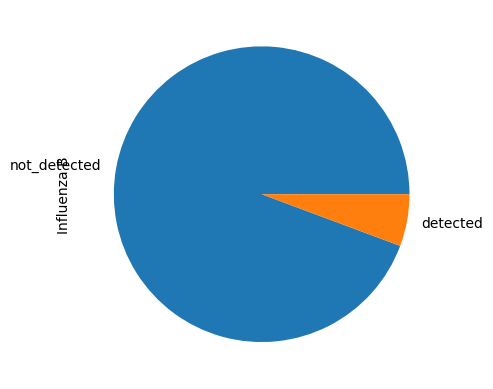

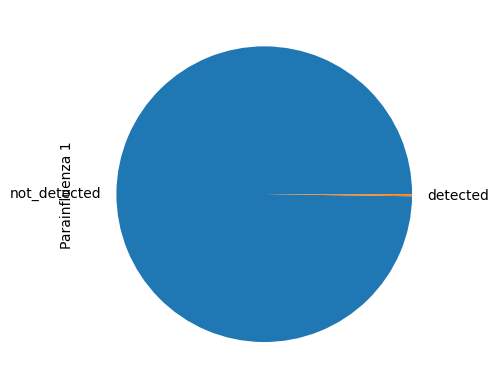

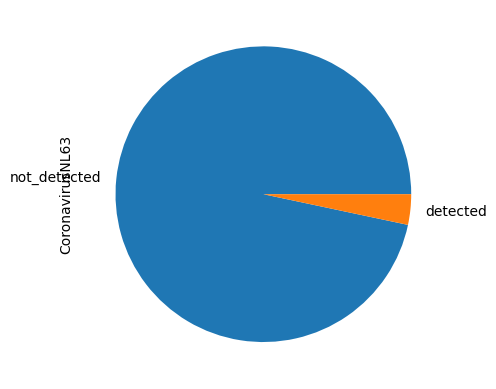

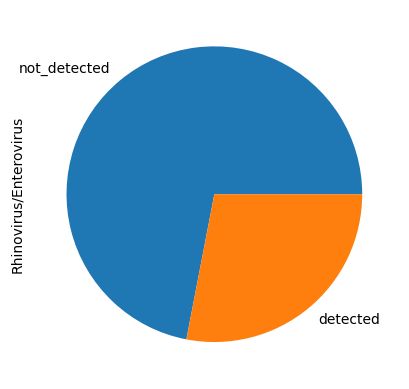

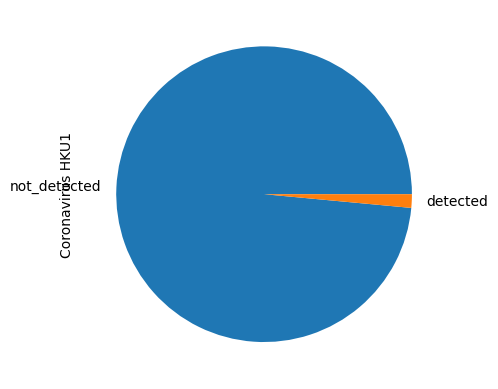

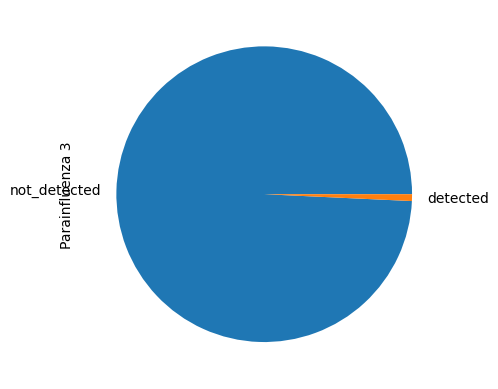

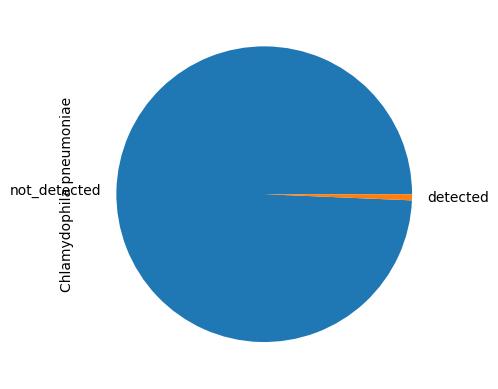

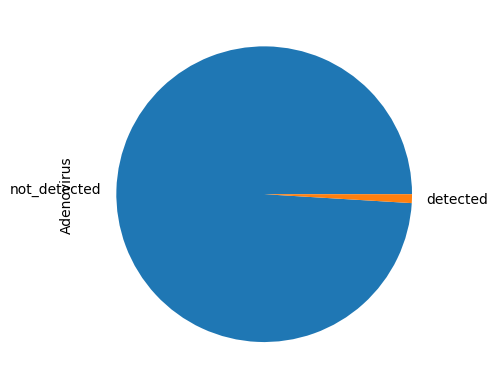

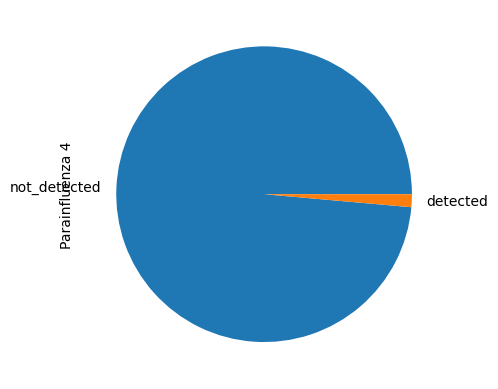

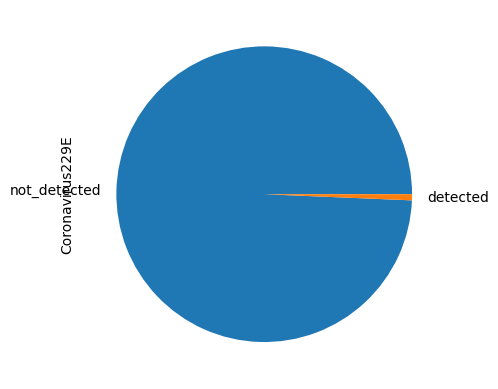

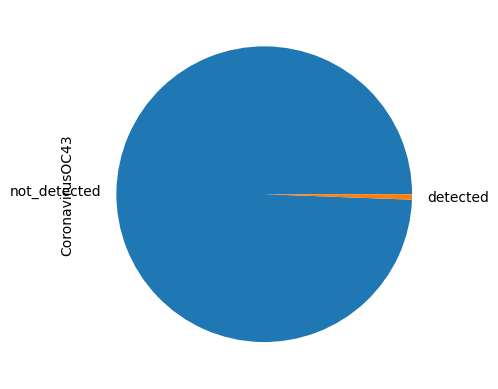

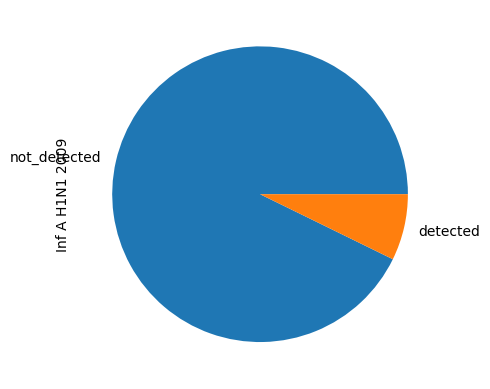

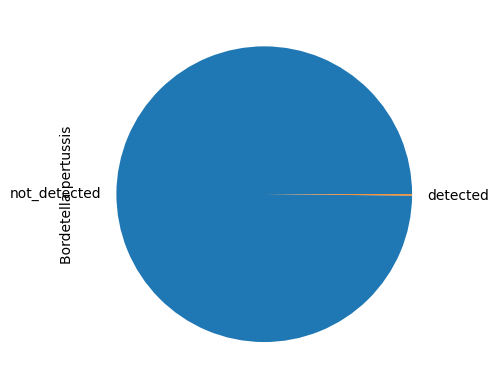

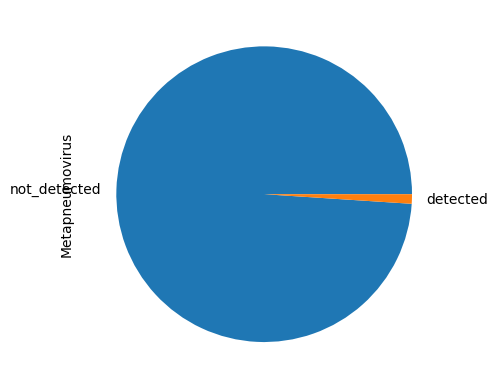

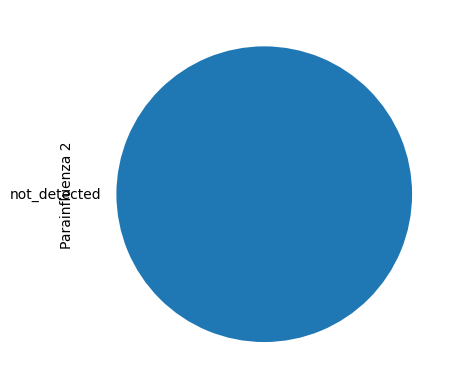

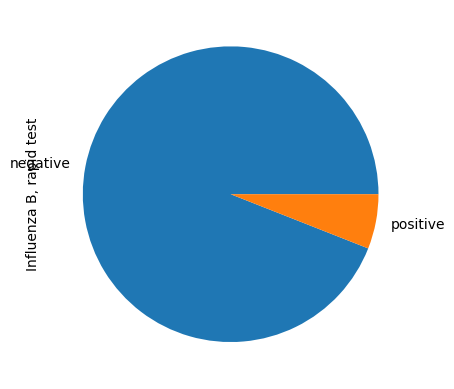

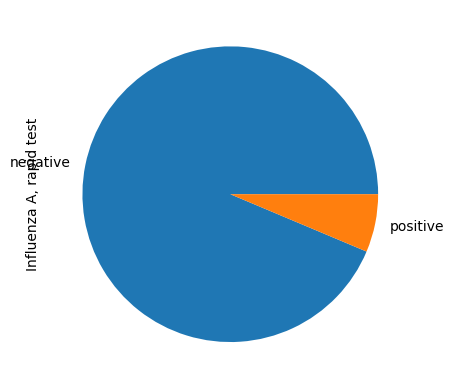

In [87]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

### Creation de sous ensembles pour chercher des relations

In [92]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']

In [93]:
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']

### Creation de sous ensemble des deux catégories de variables identifiées précédemment

In [105]:
missing_rate = df.isna().sum()/df.shape[0]

In [110]:
blood_col = df.columns[(missing_rate < 0.9) & (missing_rate > 0.88)]

In [111]:
viral_col = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]

### Relation target / blood

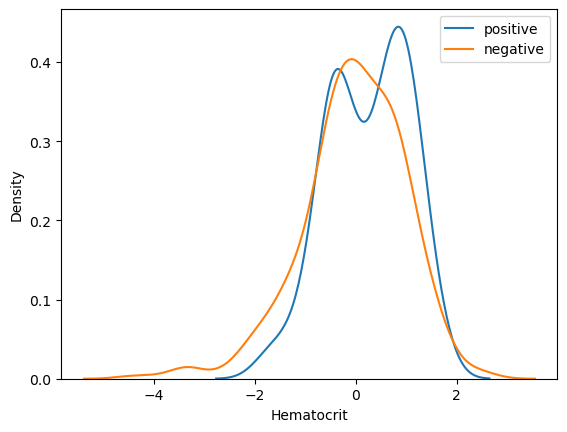

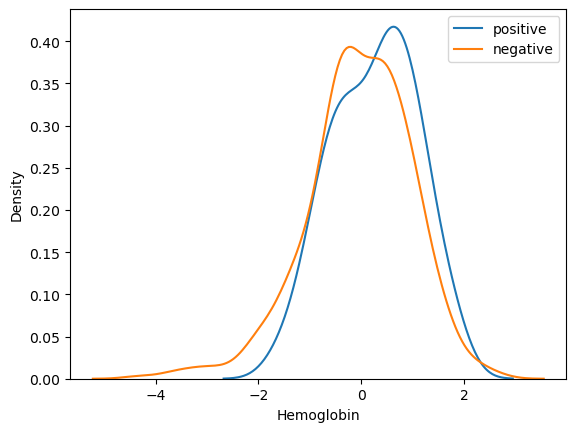

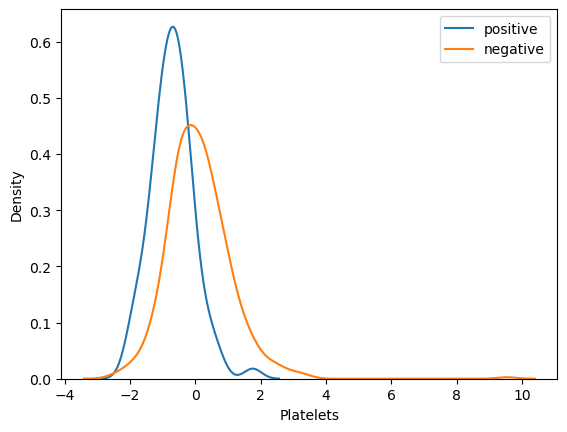

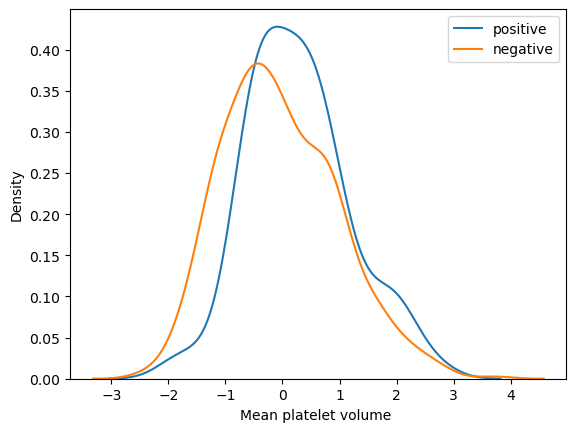

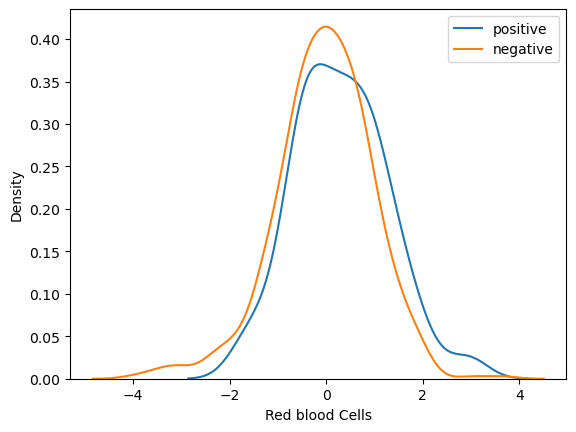

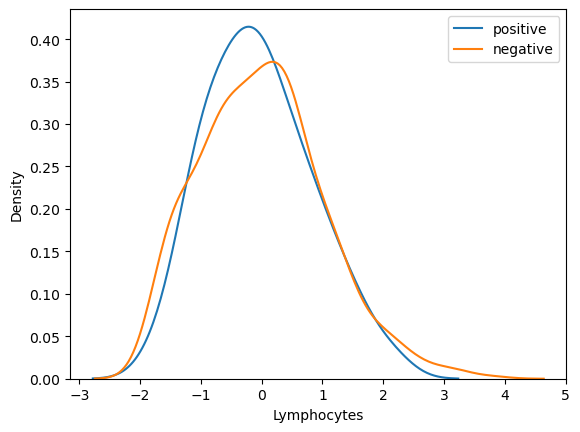

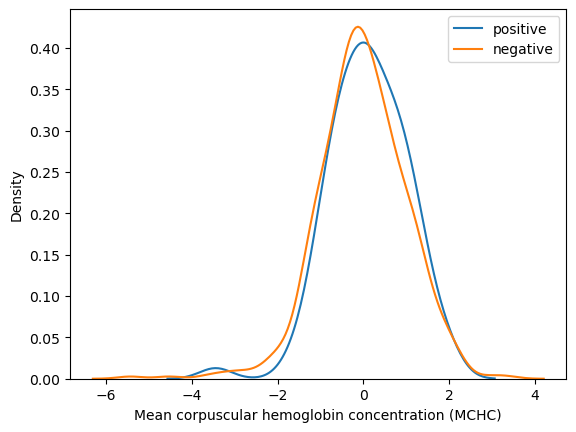

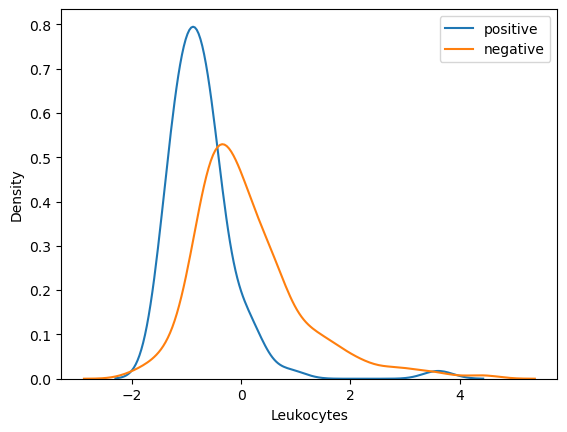

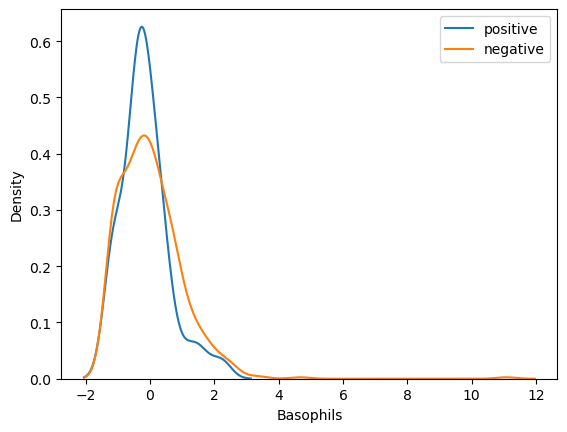

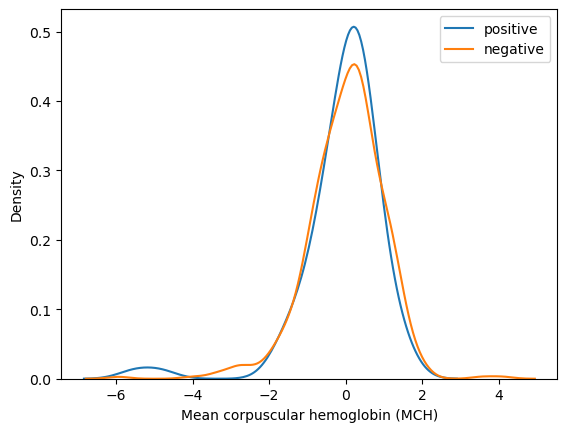

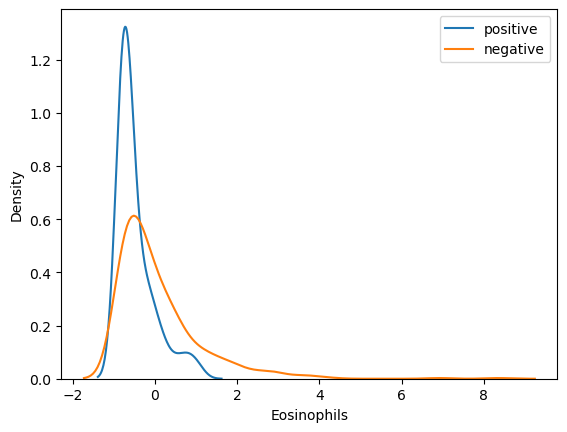

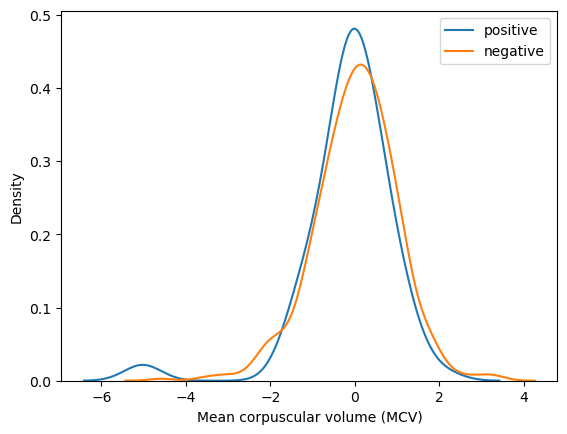

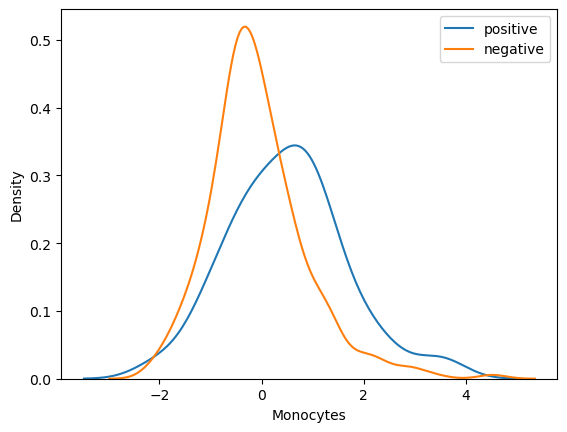

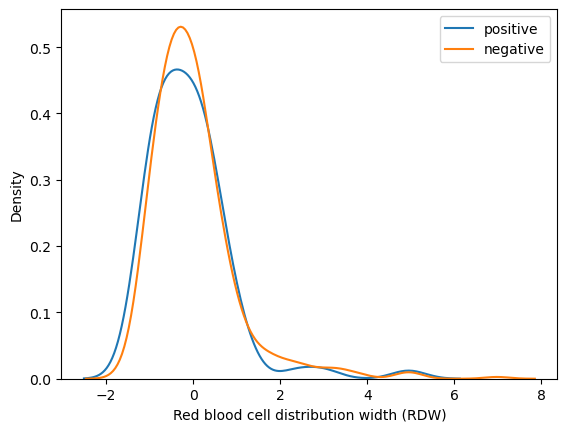

In [123]:
for col in blood_col:
    plt.figure()
    sns.kdeplot(positive_df[col], label='positive')
    sns.kdeplot(negative_df[col], label='negative')
    plt.legend()
